In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [108]:
# ------------------------------------------------------- PROBLEM STATEMENT -------------------------------------------------------

# The goal of analyzing the Superstore Sales Dataset is to explore the sales performance, understand customer purchasing behavior
# and identify factors that drive profitability.

# The dataset typically contains information about:

# Sales transactions (Order ID, Product, Category)
# Customer details (Customer ID, Region, Segment)
# Sales performance (Sales, Profit, Quantity, Discount)
# Shipping details (Ship Mode, Order Date, Ship Date)

# OBJECTIVE:
# To generate actionable insights that can help optimize inventory, improve profitability, and enhance customer targeting strategies.

In [111]:
# ------------------------------------------------------- READING DATA -------------------------------------------------------

ss = pd.read_csv(r"C:\Users\samee\OneDrive\Desktop\Practice files\Super_Store.csv",encoding='ISO-8859-1')

In [113]:
ss.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,158,CA-2014-104269,03-01-2014,03-06-2014,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.2,51.4764
1,6548,CA-2014-113880,03-01-2014,03-05-2014,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.3,-172.1172


In [116]:
# ------------------------------------------------------- DATA OVERVIEW -------------------------------------------------------

In [118]:
# checking count of rows and columns

ss.shape

(2121, 21)

In [120]:
# checking for nulls

ss.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [122]:
# Basic stats of data

ss[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327
std,503.179145,2.251620,0.181547,136.049246
min,1.892000,1.000000,0.000000,-1862.312400
25%,47.040000,2.000000,0.000000,-12.849000
50%,182.220000,3.000000,0.200000,7.774800
75%,435.168000,5.000000,0.300000,33.726600
max,4416.174000,14.000000,0.700000,1013.127000


In [124]:
# Checking data type of columns

ss.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [127]:
# ------------------------------------------------------- DATA CLEANING -------------------------------------------------------

In [129]:
#Renaming columns

ss = ss.rename(columns={'Sub-Category': 'Sub_Category'})
ss = ss.rename(columns={'Ship Mode': 'Ship_Mode'})
ss = ss.rename(columns={'Order ID': 'Order_ID'})
ss = ss.rename(columns={'Order Date': 'Order_Date'})
ss = ss.rename(columns={'Ship Date': 'Ship_Date'})

In [131]:
#Dropping unnecessary columns

ss = ss[['Order_Date', 'Ship_Date', 'Ship_Mode', 'Segment','Country','State', 'Postal Code', 'Region', 'Category', 'Sub_Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit' ]]

In [134]:
# ------------------------------------------------------- EDA -------------------------------------------------------

# Key Business Questions:

# Which products, categories, or sub-categories generate the most profit or loss?
# Which regions or cities have the highest and lowest sales performance?
# How do discounts affect profitability?
# Are there patterns in shipping modes that impact delivery speed or cost?
# How do sales trends vary over time?

In [138]:
#1: Top/Bottom Performing Sub-categories

category_profit = ss.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False)
print(category_profit)


Sub_Category
Chairs         26590.1663
Furnishings    13059.1436
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


In [140]:
#2: Which regions or states have the highest and lowest sales performance

profit = ss.groupby(['Region','State'])['Profit'].sum().sort_values(ascending=False)
print(profit)

Region   State               
West     California               9162.9656
         Washington               7193.7850
East     New York                 5857.6801
South    Virginia                 5204.3265
Central  Michigan                 4675.5516
         Wisconsin                3838.9545
South    Kentucky                 3210.9932
Central  Indiana                  2181.2753
         Oklahoma                 2153.8622
South    Georgia                  2049.4580
Central  Minnesota                2023.8871
East     Maryland                 1905.8274
South    Alabama                  1231.3882
East     Connecticut              1226.2805
         Vermont                  1191.9270
         Massachusetts            1090.0727
South    Mississippi               944.8196
East     New Jersey                932.3293
         Rhode Island              913.3770
         Delaware                  870.7072
South    Arkansas                  781.4552
         Louisiana                 685.9946
We

In [142]:
#3:Total profit per discount level

total_profit_by_discount = ss.groupby('Discount')['Profit'].sum()
print(total_profit_by_discount)

Discount
0.00    58133.0764
0.10     7111.0119
0.15     1418.9915
0.20     6265.9491
0.30   -10695.3169
0.32    -2391.1377
0.40   -16187.3968
0.45    -2493.1111
0.50   -12871.1990
0.60    -5944.6552
0.70    -3894.9394
Name: Profit, dtype: float64


In [194]:
#4: Finding patterns in shipping modes that impact delivery speed or cost

ss['Order_Date'] = pd.to_datetime(ss['Order_Date'], format = 'mixed')
ss['Ship_Date'] = pd.to_datetime(ss['Ship_Date'], format='mixed')

# Calculate delivery time in days
ss['Delivery_Time'] = (ss['Ship_Date'] - ss['Order_Date']).dt.days

# Group by Ship Mode and calculate average delivery time
avg_delivery_time = ss.groupby('Ship_Mode')['Delivery_Time'].mean().round()
print(avg_delivery_time)

Ship_Mode
First Class       2.0
Same Day          0.0
Second Class      3.0
Standard Class    5.0
Name: Delivery_Time, dtype: float64


In [192]:
#5: How do sales trends vary over time

# Extract year, month, and day
ss['Year'] = ss['Order_Date'].dt.year
ss['Month'] = ss['Order_Date'].dt.month
ss['Day'] = ss['Order_Date'].dt.day

yearly_sales = ss.groupby('Year')['Sales'].sum().round()
print(yearly_sales)

Year
2014    157193.0
2015    170518.0
2016    198901.0
2017    215387.0
Name: Sales, dtype: float64


In [198]:
# FINDING OUTLIERS

# Detect outliers in 'Sales' column using IQR

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Detect outliers in 'Sales' and 'Profit'
sales_outliers = detect_outliers_iqr(ss, 'Sales')
profit_outliers = detect_outliers_iqr(ss, 'Profit')

# Print how many outliers
print(f"Sales Outliers: {len(sales_outliers)}")
print(f"Profit Outliers: {len(profit_outliers)}")


Sales Outliers: 164
Profit Outliers: 407


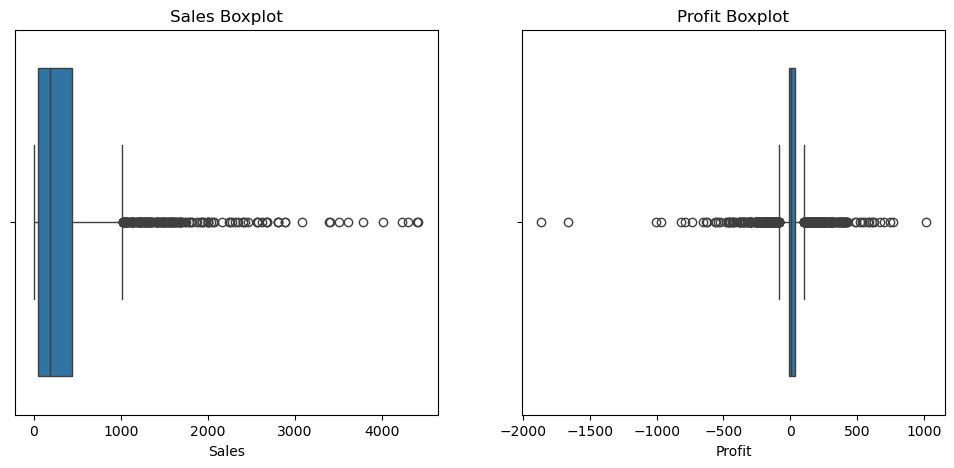

In [202]:
# FINDING OUTLIERS USING BOXPLOT

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=ss['Sales'])
plt.title('Sales Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=ss['Profit'])
plt.title('Profit Boxplot')

plt.show()

In [ ]:
# ------------------------------------------------------- VISUALIZATIONS -------------------------------------------------------

# Tools used- Matplotlib and Seaborn

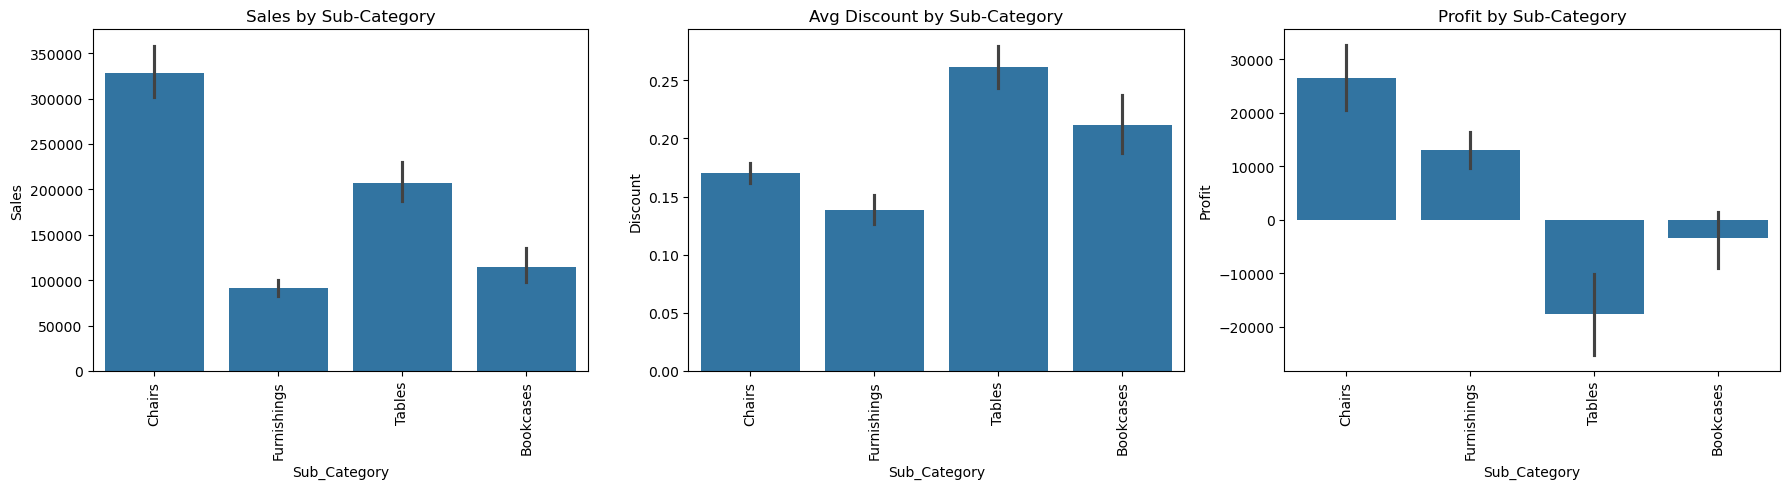

In [248]:
# Sub-Category analysis 

# Plotting Sales, Discounts and Profits by Sub-Categories

plt.figure(figsize=(18, 5)) 

# Plot 1: Sales
plt.subplot(1, 3, 1)
sns.barplot(x='Sub_Category', y='Sales', data=ss, estimator=sum)
plt.title('Sales by Sub-Category')
plt.xticks(rotation=90)

# Plot 2: Discount
plt.subplot(1, 3, 2)
sns.barplot(x='Sub_Category', y='Discount', data=ss, estimator='mean')  # average discount
plt.title('Avg Discount by Sub-Category')
plt.xticks(rotation=90)

# Plot 3: Profit
plt.subplot(1, 3, 3)
sns.barplot(x='Sub_Category', y='Profit', data=ss, estimator=sum)
plt.title('Profit by Sub-Category')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Top 10 states by Sales')

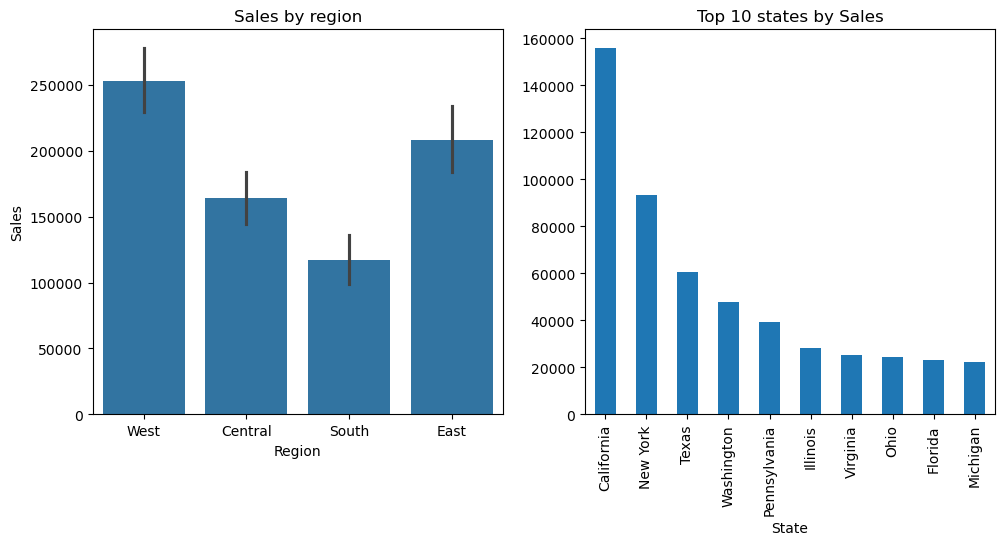

In [296]:
# Region analysis

plt.figure(figsize=(18, 5)) 

# Plot 1: Sales by region
plt.subplot(1, 3, 1)
sns.barplot(x='Region', y='Sales', data=ss, estimator=sum);
plt.title('Sales by region')

# Plot 2: Top 10 states by Sales

plt.subplot(1, 3, 2)
top_states = ss.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar')
plt.title('Top 10 states by Sales')

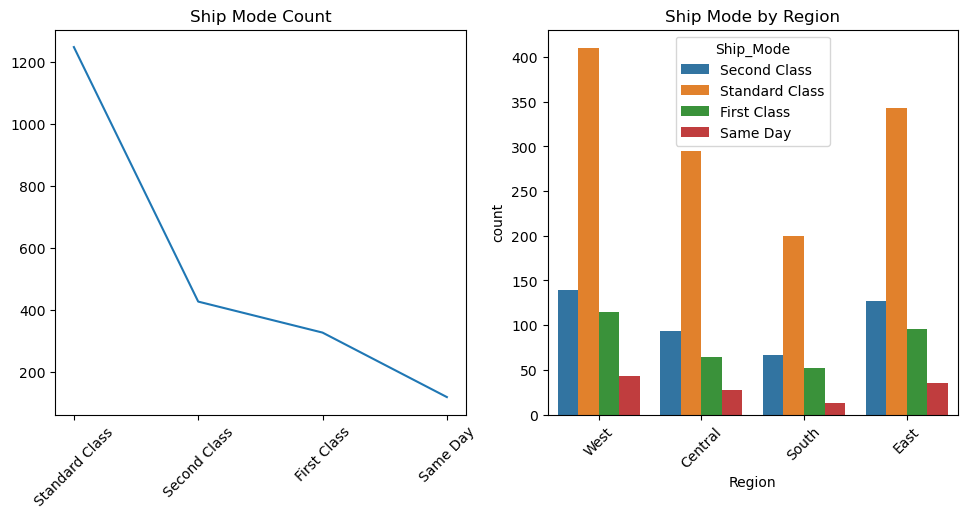

In [358]:
# Ship mode analysis

plt.figure(figsize=(18, 5)) 

# Plot 1: Line plot of Ship Mode counts
plt.subplot(1, 3, 1)
df = ss.Ship_Mode.value_counts()
plt.plot(df)
plt.title('Ship Mode Count')
plt.xticks(rotation=45)

# Plot 2: Ship Mode by Region using countplot (not catplot)
plt.subplot(1, 3, 2)
sns.countplot(x='Region', hue='Ship_Mode', data=ss)
plt.title('Ship Mode by Region')
plt.xticks(rotation=45)

plt.show()

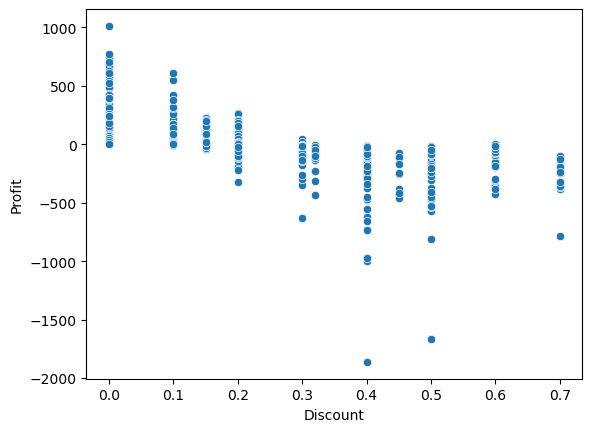

In [332]:
# Relation between profit and discount analysis

sns.scatterplot(x='Discount', y='Profit', data=ss);

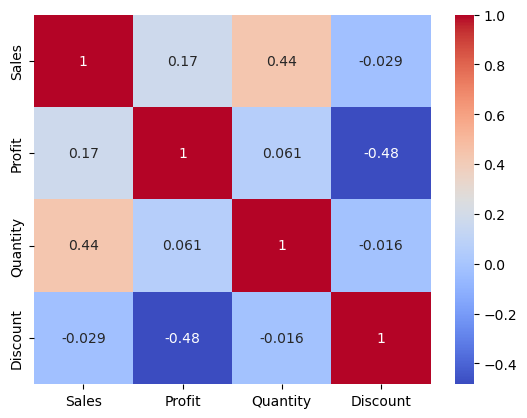

In [360]:
# Co relation analysis

sns.heatmap(ss[['Sales', 'Profit', 'Quantity', 'Discount']].corr(), annot=True, cmap='coolwarm');